In [1]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, FloatType, IntegerType
from pyspark.sql.functions import col, regexp_replace
from pyspark.sql.functions import *
import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
###IMPORTING THE DATASET


spark = SparkSession.builder.appName("GooglePlayStore").getOrCreate()
data = spark.read.csv(r"C:\Users\jp\Downloads\googleplaystore.csv", header=True, inferSchema=True)

data.show(2)

+--------------------+--------------+------+-------+----+--------+----+-----+--------------+--------------------+----------------+-----------+------------+
|                 App|      Category|Rating|Reviews|Size|Installs|Type|Price|Content Rating|              Genres|    Last Updated|Current Ver| Android Ver|
+--------------------+--------------+------+-------+----+--------+----+-----+--------------+--------------------+----------------+-----------+------------+
|Photo Editor & Ca...|ART_AND_DESIGN|   4.1|    159| 19M| 10,000+|Free|    0|      Everyone|        Art & Design| January 7, 2018|      1.0.0|4.0.3 and up|
| Coloring book moana|ART_AND_DESIGN|   3.9|    967| 14M|500,000+|Free|    0|      Everyone|Art & Design;Pret...|January 15, 2018|      2.0.0|4.0.3 and up|
+--------------------+--------------+------+-------+----+--------+----+-----+--------------+--------------------+----------------+-----------+------------+
only showing top 2 rows



In [3]:
####DROP UNWANTED COLUMNS

data = data.drop('Android Ver', 'Current Ver', 'Last Updated', 'Content Rating')

In [4]:
data.printSchema()

root
 |-- App: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Rating: string (nullable = true)
 |-- Reviews: string (nullable = true)
 |-- Size: string (nullable = true)
 |-- Installs: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Price: string (nullable = true)
 |-- Genres: string (nullable = true)



In [5]:
###CONVERTING THE DATATYPE


data = data.withColumn("Reviews", col("Reviews").cast(IntegerType()))\
    .withColumn("installs", regexp_replace(col("installs"), "[^0-9]", ""))\
    .withColumn("installs", col("installs").cast(IntegerType()))\
    .withColumn("price", regexp_replace(col("price"), "[$]", ""))\
    .withColumn("price", col("price").cast(IntegerType()))

In [6]:
from IPython import get_ipython
get_ipython().run_line_magic('load_ext', 'sql')

In [7]:
data.createOrReplaceTempView("appstore")

In [8]:
result = spark.sql("SELECT * FROM appstore LIMIT 10")

result.show()

+--------------------+--------------+------+-------+----+--------+----+-----+--------------------+
|                 App|      Category|Rating|Reviews|Size|installs|Type|price|              Genres|
+--------------------+--------------+------+-------+----+--------+----+-----+--------------------+
|Photo Editor & Ca...|ART_AND_DESIGN|   4.1|    159| 19M|   10000|Free|    0|        Art & Design|
| Coloring book moana|ART_AND_DESIGN|   3.9|    967| 14M|  500000|Free|    0|Art & Design;Pret...|
|U Launcher Lite –...|ART_AND_DESIGN|   4.7|  87510|8.7M| 5000000|Free|    0|        Art & Design|
|Sketch - Draw & P...|ART_AND_DESIGN|   4.5| 215644| 25M|50000000|Free|    0|        Art & Design|
|Pixel Draw - Numb...|ART_AND_DESIGN|   4.3|    967|2.8M|  100000|Free|    0|Art & Design;Crea...|
|Paper flowers ins...|ART_AND_DESIGN|   4.4|    167|5.6M|   50000|Free|    0|        Art & Design|
|Smoke Effect Phot...|ART_AND_DESIGN|   3.8|    178| 19M|   50000|Free|    0|        Art & Design|
|    Infin

In [9]:
result.select("App", "Rating").filter(result["Rating"] > 4.0).show()

+--------------------+------+
|                 App|Rating|
+--------------------+------+
|Photo Editor & Ca...|   4.1|
|U Launcher Lite –...|   4.7|
|Sketch - Draw & P...|   4.5|
|Pixel Draw - Numb...|   4.3|
|Paper flowers ins...|   4.4|
|    Infinite Painter|   4.1|
|Garden Coloring Book|   4.4|
|Kids Paint Free -...|   4.7|
+--------------------+------+



### Total reviews aggregated by app

In [11]:
agg_result = spark.sql("SELECT App, SUM(Reviews) as total_reviews FROM appstore GROUP BY App")
agg_result.show()

+--------------------+-------------+
|                 App|total_reviews|
+--------------------+-------------+
|Google Chrome: Fa...|     28928148|
|free video calls ...|      1784176|
|Toddler Learning ...|          731|
|             MyChart|        19473|
|Davis's Drug Guid...|          572|
|    Diabetes Testing|            1|
|Mercari: The Sell...|       101883|
|Find&Save - Local...|         4602|
|                SNCF|        15750|
|Learn the letters...|           31|
|Nigeria News NAIJ...|        37882|
|    Basketball Stars|       867920|
|          C Examples|         1002|
|            Q Wunder|          156|
|         Q-Ticketing|          114|
|Learn R Language ...|           17|
| Al-Quran Al-Muallim|          199|
|THE KING OF FIGHT...|       406511|
|Ay Yıldız Analog ...|           37|
|A-Z Punjabi Songs...|          367|
+--------------------+-------------+
only showing top 20 rows



### Top 10 most reviewed apps

In [13]:
sum_top_review = spark.sql("""
    SELECT App, SUM(Reviews) AS total_reviews
    FROM appstore
    GROUP BY App
    ORDER BY total_reviews DESC
""")

sum_top_review.show(10)

+--------------------+-------------+
|                 App|total_reviews|
+--------------------+-------------+
|           Instagram|    266241989|
|  WhatsApp Messenger|    207348304|
|      Clash of Clans|    179558781|
|Messenger – Text ...|    169932272|
|      Subway Surfers|    166331958|
|    Candy Crush Saga|    156993136|
|            Facebook|    156286514|
|         8 Ball Pool|     99386198|
|        Clash Royale|     92530298|
|            Snapchat|     68045010|
+--------------------+-------------+
only showing top 10 rows



### Top 10 most installed apps

+--------------+----+--------------+
|           App|Type|total_installs|
+--------------+----+--------------+
|Subway Surfers|Free|    6000000000|
|  Google Drive|Free|    4000000000|
+--------------+----+--------------+
only showing top 2 rows



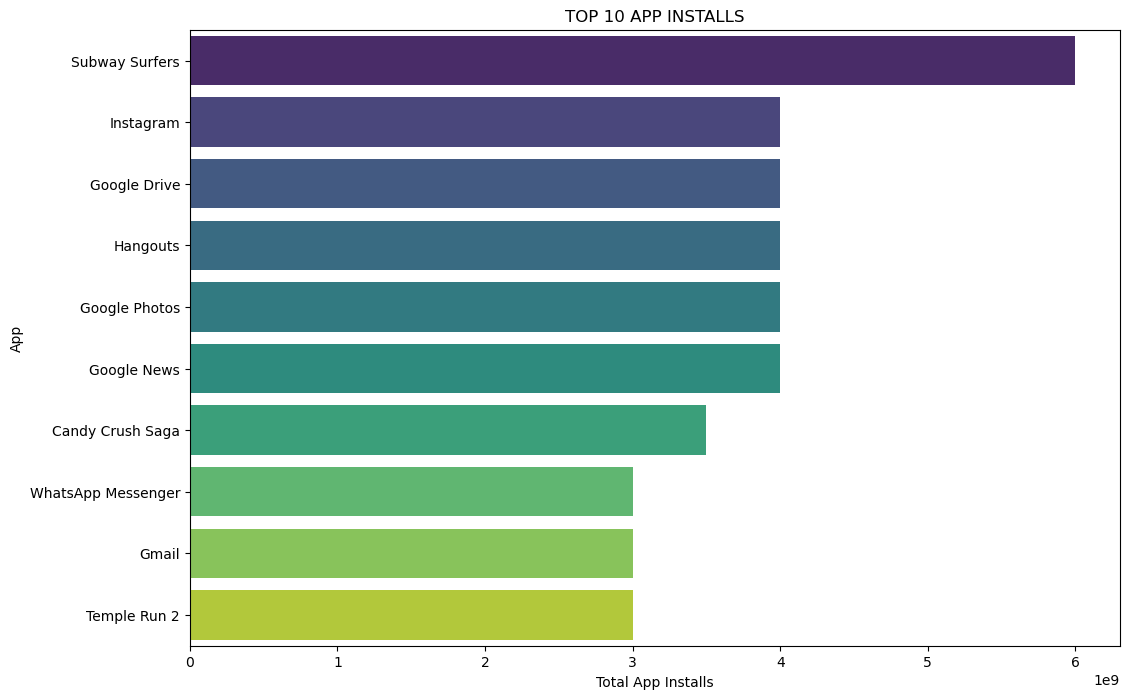

In [15]:
top_10 = spark.sql("""
    SELECT App, Type, SUM(installs) AS total_installs
    FROM appstore
    GROUP BY App, Type
    ORDER BY total_installs DESC
    LIMIT 10
""")
top_10.show(2)


pandas_top_10 = top_10.toPandas()

plt.figure(figsize=(12, 8))
sns.barplot(x='total_installs', y='App', data=pandas_top_10, palette='viridis')

plt.title('TOP 10 APP INSTALLS')
plt.xlabel('Total App Installs')
plt.ylabel('App')
plt.show()

### Category-wise distribution of installed apps

+-------------+--------------+
|     Category|total_installs|
+-------------+--------------+
|         GAME|   35086024415|
|COMMUNICATION|   32647276251|
+-------------+--------------+
only showing top 2 rows



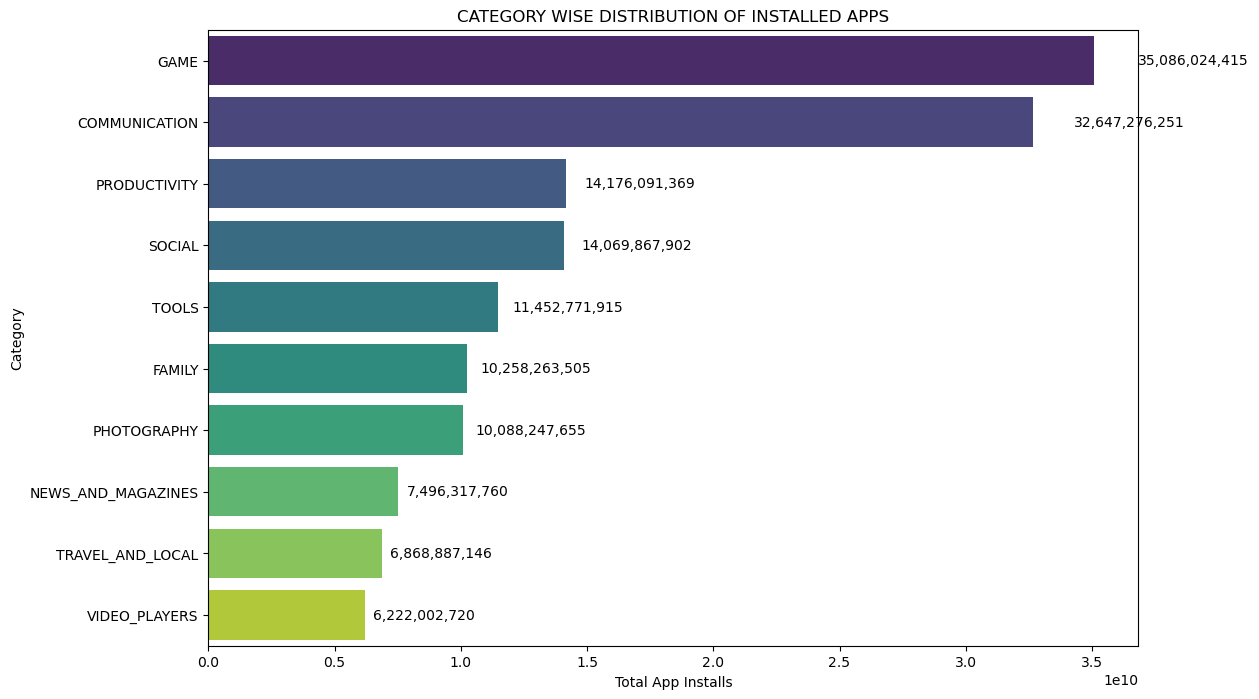

In [17]:
CATEGORY = spark.sql("""
    SELECT Category, SUM(installs) AS total_installs
    FROM appstore
    GROUP BY Category
    ORDER BY total_installs DESC
    LIMIT 10
""")

CATEGORY.show(2)

CATEGORY = CATEGORY.toPandas()


plt.figure(figsize=(12, 8))
ax = sns.barplot(x='total_installs', y='Category', data=CATEGORY, palette='viridis')

for p in ax.patches:
    width = p.get_width()
    label = f'{int(width):,}'  
    ax.text(width + 0.05 * width, p.get_y() + p.get_height() / 2, label, 
            ha='left', va='center', color='black')

plt.title('CATEGORY WISE DISTRIBUTION OF INSTALLED APPS')
plt.xlabel('Total App Installs')
plt.ylabel('Category')
plt.show()

### Highest-rated paid apps

+--------------------+----------+
|                 App|price_apps|
+--------------------+----------+
|I'm Rich - Trump ...|       400|
|most expensive ap...|       399|
|  I am rich(premium)|       399|
|   I Am Rich Premium|       399|
|      I am Rich Plus|       399|
|I'm Rich/Eu sou R...|       399|
|       I Am Rich Pro|       399|
|  I AM RICH PRO PLUS|       399|
|           I am Rich|       399|
|          I am Rich!|       399|
+--------------------+----------+



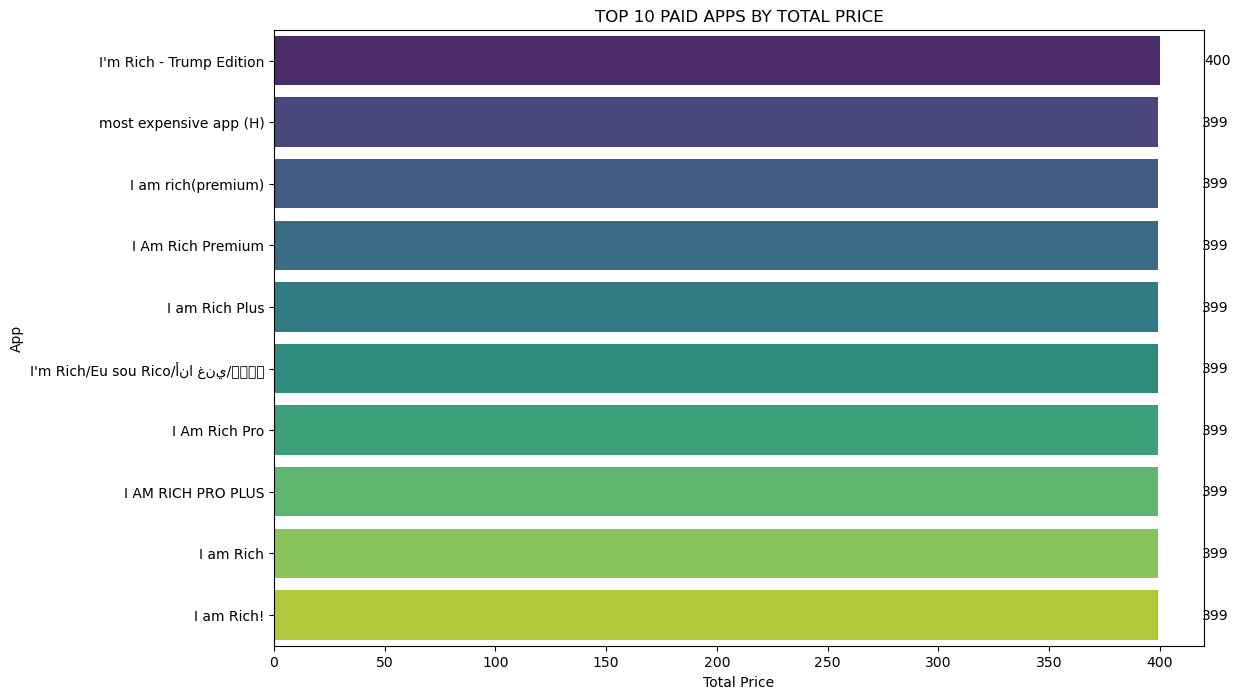

In [19]:
paid = spark.sql("""
    SELECT App, SUM(price) AS price_apps
    FROM appstore
    where Type = "Paid"
    GROUP BY App
    ORDER BY price_apps DESC
    LIMIT 10
""")

paid.show()


paid_df = paid.toPandas()

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='price_apps', y='App', data=paid_df, palette='viridis')

for p in ax.patches:
    width = p.get_width()
    label = f'{int(width):,}'  
    ax.text(width + 0.05 * width, p.get_y() + p.get_height() / 2, label, 
            ha='left', va='center', color='black')

plt.title('TOP 10 PAID APPS BY TOTAL PRICE')
plt.xlabel('Total Price')
plt.ylabel('App')
plt.show()

### Top-rated paid apps

In [21]:
paid_rating = spark.sql("""
    SELECT App, Rating, Price AS top_paid
    FROM appstore
    WHERE Type = 'Paid'
    ORDER BY top_paid DESC
    LIMIT 10
""")

paid_rating.show()

+--------------------+------+--------+
|                 App|Rating|top_paid|
+--------------------+------+--------+
|I'm Rich - Trump ...|   3.6|     400|
|I am rich (Most e...|   4.1|     399|
|      I am Rich Plus|   4.0|     399|
|           I am rich|   3.8|     399|
|         💎 I'm rich|   3.8|     399|
|most expensive ap...|   4.3|     399|
|   I Am Rich Premium|   4.1|     399|
|       I Am Rich Pro|   4.4|     399|
|          I am Rich!|   3.8|     399|
|  I am rich(premium)|   3.5|     399|
+--------------------+------+--------+



### Top 5 genres by average installs

In [23]:
genre = spark.sql("""

SELECT Genres, AVG(installs) as total_installs
FROM appstore
GROUP BY Genres
ORDER BY total_installs DESC
LIMIT 5;
""")

genre.show()

+--------------------+-------------------+
|              Genres|     total_installs|
+--------------------+-------------------+
|       Communication|8.435988695348836E7|
|Adventure;Action ...|6.970384615384616E7|
|              Casual|5.006648051813471E7|
|              Arcade|4.875967797727273E7|
|              Social|4.769446746440678E7|
+--------------------+-------------------+



### Count of ratings by category

+--------+------------+
|Category|count_rating|
+--------+------------+
|  FAMILY|        1972|
|    GAME|        1144|
|   TOOLS|         843|
| MEDICAL|         463|
|BUSINESS|         460|
+--------+------------+



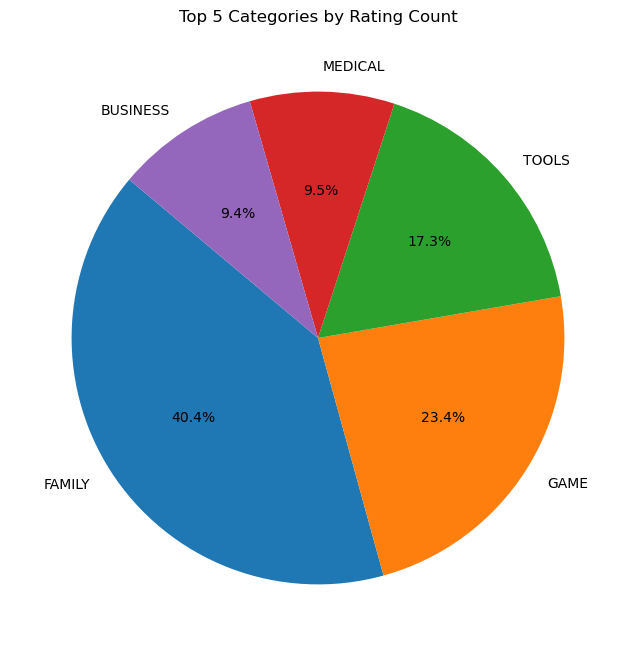

In [25]:
count_rating = spark.sql("""

SELECT Category, COUNT(Rating) as count_rating
FROM appstore
GROUP BY Category
ORDER BY count_rating DESC
LIMIT 5;
""")

count_rating.show()

count_rating_pd = count_rating.toPandas()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(count_rating_pd['count_rating'], labels=count_rating_pd['Category'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Categories by Rating Count')
plt.show()